In [3]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download dataset using KaggleHub
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
file_path = f"{path}/heart_disease_uci.csv"

# Load dataset
heart_data = pd.read_csv(file_path, encoding="latin1")

# Display basic information
print("Dataset Preview:")
print(heart_data.head())
print("\nDataset Information:")
print(heart_data.info())

# Check for missing values
print("\nMissing Values:")
print(heart_data.isnull().sum())

# Data Preprocessing
# Separate features and target variable
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_data["target"], palette="viridis")
plt.title("Distribution of Target Variable (Heart Disease)")
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.show()

# Plot correlations
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Classification Model: Logistic Regression
# Initialize and fit the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save Preprocessed Dataset
processed_file_path = f"{path}/processed_heart_data.csv"
heart_data.to_csv(processed_file_path, index=False)
print(f"\nPreprocessed dataset saved to: {processed_file_path}")


Dataset Preview:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

KeyError: "['target'] not found in axis"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

100%|██████████| 12.4k/12.4k [00:00<00:00, 16.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


In [4]:

# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column (defaulting to "target" if present)
target_col = "target" if "target" in heart_data.columns else heart_data.columns[-1]  # Assuming last column is target if unnamed
print(f"\nUsing '{target_col}' as the target column.")

# Data Preprocessing
# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title(f"Distribution of Target Variable ({target_col})")
plt.xlabel(f"Target ({target_col})")
plt.ylabel("Count")
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Build the Classification Model: Logistic Regression
# Initialize and fit the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.


ValueError: could not convert string to float: 'Male'


Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


<ipython-input-5-50b2e9468763>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


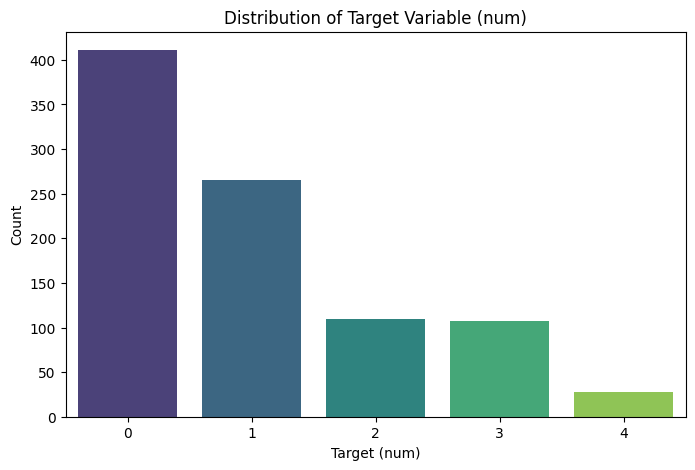

ValueError: could not convert string to float: 'Male'

<Figure size 1200x800 with 0 Axes>

In [5]:

# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Convert categorical features to numeric using one-hot encoding or label encoding
categorical_columns = X.select_dtypes(include=["object"]).columns
print(f"\nCategorical Columns: {categorical_columns.tolist()}")
if not categorical_columns.empty:
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title(f"Distribution of Target Variable ({target_col})")
plt.xlabel(f"Target ({target_col})")
plt.ylabel("Count")
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Build the Classification Model: Logistic Regression
# Initialize and fit the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


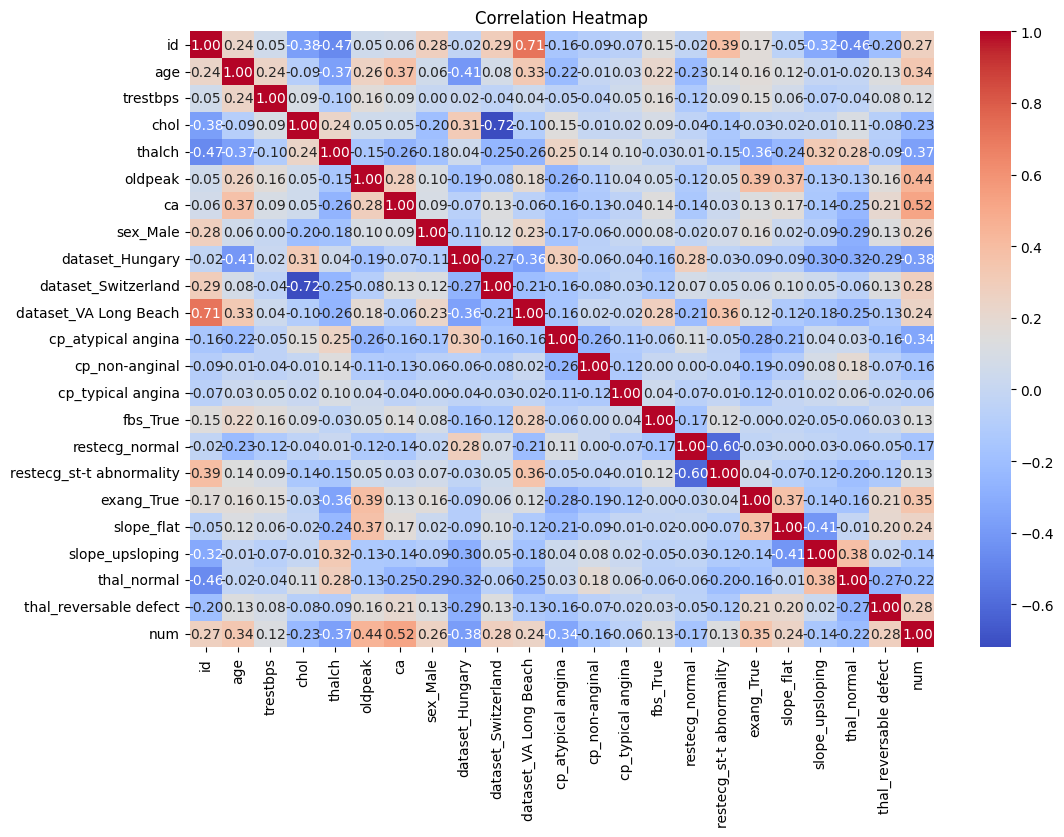

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:


# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Data Preprocessing
# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Convert categorical features to numeric using one-hot encoding or label encoding
categorical_columns = X.select_dtypes(include=["object"]).columns
print(f"\nCategorical Columns: {categorical_columns.tolist()}")
if not categorical_columns.empty:
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Add the target column back to the dataset for correlation analysis
processed_heart_data = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(processed_heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the Classification Model: Logistic Regression
# Initialize and fit the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:


# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Data Preprocessing
# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Handle missing values by imputing with the column median
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Convert categorical features to numeric using one-hot encoding or label encoding
categorical_columns = X.select_dtypes(include=["object"]).columns
print(f"\nCategorical Columns: {categorical_columns.tolist()}")
if not categorical_columns.empty:
    X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Add the target column back to the dataset for correlation analysis
processed_heart_data = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(processed_heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the Classification Model: Logistic Regression
# Initialize and fit the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Male'


Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Model Accuracy:
Accuracy: 61.96%

Confusion Matrix:


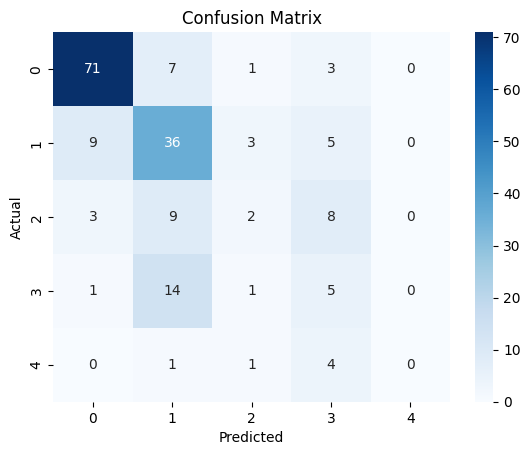


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.54      0.68      0.60        53
           2       0.25      0.09      0.13        22
           3       0.20      0.24      0.22        21
           4       0.00      0.00      0.00         6

    accuracy                           0.62       184
   macro avg       0.37      0.37      0.36       184
weighted avg       0.58      0.62      0.59       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print(f"\nNumeric Columns: {numeric_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Preprocessing for numeric data: Impute missing values with median and standardize
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [13]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print(f"\nNumeric Columns: {numeric_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Preprocessing for numeric data: Standardize
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data: One-hot encode
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Preprocess the data and apply SMOTE to address class imbalance
X_processed = preprocessor.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Model Evaluation: Random Forest
print("\nRandom Forest - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred) * 100:.2f}%")

print("\nRandom Forest - Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Model Evaluation: Gradient Boosting
print("\nGradient Boosting - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, gb_y_pred) * 100:.2f}%")

print("\nGradient Boosting - Confusion Matrix:")
conf_matrix_gb = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, gb_y_pred))



Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Column Names in the Dataset:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Using 'num' as the target column.

Numeric Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class distribution after SMOTE:
num
0    411
2    411
1    411
3    411
4    411
Name: count, dtype: int64

Random Forest - Model Accuracy:
Accuracy: 85.89%

Random Forest - Confusion Matrix:


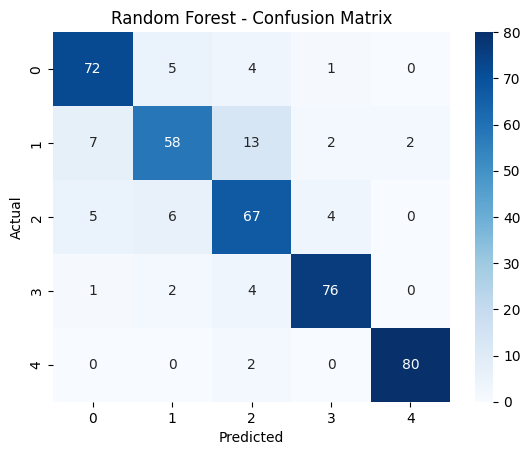


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.82      0.71      0.76        82
           2       0.74      0.82      0.78        82
           3       0.92      0.92      0.92        83
           4       0.98      0.98      0.98        82

    accuracy                           0.86       411
   macro avg       0.86      0.86      0.86       411
weighted avg       0.86      0.86      0.86       411


Gradient Boosting - Model Accuracy:
Accuracy: 76.16%

Gradient Boosting - Confusion Matrix:


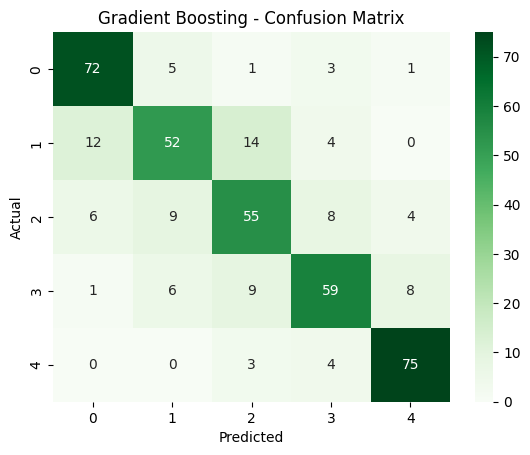


Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.72      0.63      0.68        82
           2       0.67      0.67      0.67        82
           3       0.76      0.71      0.73        83
           4       0.85      0.91      0.88        82

    accuracy                           0.76       411
   macro avg       0.76      0.76      0.76       411
weighted avg       0.76      0.76      0.76       411



In [14]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



# Display column names to identify the target column
print("\nColumn Names in the Dataset:")
print(heart_data.columns.tolist())

# Identify the target column
target_col = "num"  # Based on your dataset structure
print(f"\nUsing '{target_col}' as the target column.")

# Separate features (X) and target variable (y)
X = heart_data.drop(target_col, axis=1)
y = heart_data[target_col]

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print(f"\nNumeric Columns: {numeric_columns}")
print(f"Categorical Columns: {categorical_columns}")

# Preprocessing for numeric data: Impute missing values with median and standardize
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Model Evaluation: Random Forest
print("\nRandom Forest - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred) * 100:.2f}%")

print("\nRandom Forest - Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Model Evaluation: Gradient Boosting
print("\nGradient Boosting - Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_test, gb_y_pred) * 100:.2f}%")

print("\nGradient Boosting - Confusion Matrix:")
conf_matrix_gb = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, gb_y_pred))
